In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['MadaLine.csv']))

Saving MadaLine.csv to MadaLine.csv


            x         y  label
0   -0.642823  0.720606      0
1   -0.218126  0.677263      0
2   -0.582930 -0.347496      0
3    0.285127  0.091750      0
4   -0.335577 -0.313893      0
..        ...       ...    ...
195  0.744066 -1.206548      1
196 -0.457547  1.286227      1
197 -1.020000 -0.783926      1
198  1.363429 -0.800250      1
199 -1.246702 -0.388615      1

[200 rows x 3 columns]


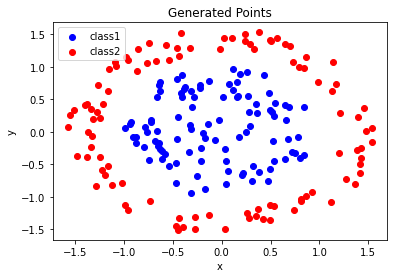

In [ ]:
print(df)

df1 = df.iloc[:100,:]
df2 = df.iloc[100:,:]

x1 = df1.iloc[:,0]
y1 = df1.iloc[:,1]
x2 = df2.iloc[:,0]
y2 = df2.iloc[:,1]

# Plot Points
plt.scatter(x1, y1, marker="o", label='class1', color = 'blue')
plt.scatter(x2, y2, marker="o", label='class2', color = 'red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Points')
plt.legend(loc= 'upper left')
plt.show()



In [ ]:
class MadalineNet:
  def __init__(self, n_size, w_size, alpha):
      
      self.W1 = np.random.rand(n_size, w_size)
      self.B = np.random.rand(n_size)
      self.alpha = alpha

      self.W2 = np.ones(n_size)/n_size
      self.b2 = 0

  def forward(self, X, t, train=True):
      Q_in = self.B + np.matmul(self.W1, X)
      Q = np.where(Q_in >= 0, 1, -1)

      y_in = self.W2 @ Q + self.b2
      f_y = -np.where(y_in >= 0, 1, -1)
      
      if train:
        if f_y.item() != t:
          if t == 1:
            idx = np.argmax(Q_in)
            self.W1[idx] = self.W1[idx] + (self.alpha * (1 - Q_in[idx])*X)
            self.B[idx] = self.B[idx] + (self.alpha * (1 - Q_in[idx]))
          else:
            for i in range(len(Q_in)):
              if Q_in[i]<0:
                self.W1[i] = self.W1[i] + (self.alpha * (-1 - Q_in[i])*X)
                self.B[i] = self.B[i] + (self.alpha* (-1 - Q_in[i]))
          

      return f_y.item()

In [ ]:
g1 = np.column_stack((x1,y1))
t1 = np.ones(len(g1))
g2 = np.column_stack((x2,y2))
t2 = -np.ones(len(g2))

X_train = np.concatenate((g1,g2))
y_train = np.concatenate((t1,t2))

rnd_idx = np.arange(len(y_train))
np.random.shuffle(rnd_idx)

X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

net = MadalineNet(3, 2, 0.001)

In [ ]:
acc = []
for e in range(200):
  pred = []
  for i in range(len(X_train)):
    x = X_train[i]
    t = y_train[i]
    pred.append(net.forward(x, t, train=True))
  acc.append(np.mean(pred == y_train) * 100)

In [ ]:
print("Experiment with MadaLine with 8 Neuorons:")
print("Number of epochs for this experiment:", epochs, "Alpha:", alpha)
print("Accuracy:", acc,"%")

Experiment with MadaLine with 8 Neuorons:
Number of epochs for this experiment: 1200 Alpha: 0.001
Accuracy: 100 %
